# Assignment 4
## Due May 15th

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

Here you would normaly get a "RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility" warning. You do not since we silenced the warning in the first cell. If you are interested read here
https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility

In [27]:
def get_data_x_cube(n):
        
    x = np.random.uniform(0, 4, n)
    X = np.expand_dims(x, axis=-1)
    y = 3*(x-2)**3 + 0.1*np.random.normal(0, 1, n)
    Y = np.expand_dims(y, axis=-1)
    
    return X, Y

In [28]:
def get_data(n):
        
    x = np.random.uniform(0, 4, n)
    X = np.expand_dims(x, axis=-1)
    y = x + np.random.normal(0, 3, n)
    Y = np.expand_dims(y, axis=-1)
    
    return X, Y

# Exercise 1

### a)

In [29]:
def MSE(Y_pred, Y):
    error = np.mean((Y - Y_pred)**2)
    return error

### b)

In [422]:
def k_fold_evaluation_MSE(classifier, X, Y, K=10):
    errors = []
    for k in list(range(1, K)): 
        
        index = int(np.ceil(len(X)/K))
        split1X, testX, split2X = np.split(X, [(k-1)*index, k*index])
        new_trainX = np.concatenate((split1X, split2X))
        
        split1Y, testY, split2Y = np.split(Y, [(k-1)*index, k*index])
        new_trainY = np.concatenate((split1Y, split2Y))
        
        classifier.fit(new_trainX, new_trainY)
        Y_pred = classifier.predict(testX)
        val_error = MSE(Y_pred, testY)
        errors.append(val_error)
    return errors

### c)

In [438]:
def k_fold_cv_ridge(X, Y, lambdas, K=10):
    val_errors = []
    for lam in lambdas: 
        c = Ridge(lam)
        errors = k_fold_evaluation_MSE(c, X, Y, K)
        error = sum(errors)/K
        val_errors.append(error)
#    lam = lamdas[np.argmin(val_errors)]
    return val_errors 

In [439]:
X, Y = get_data_x_cube(300)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

In [440]:
# test the two functions 
lambdas = [10**(-3), 10**(-2), 10**(-1), 1, 10, 100]
val_errors = k_fold_cv_ridge(X_train, Y_train, lambdas, K=10)
val_errors

[9.255353663301445,
 9.255108699791247,
 9.252702305786817,
 9.232887404718195,
 9.393608801323834,
 20.603808108055684]

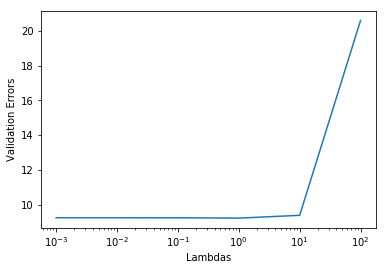

In [443]:
# plot MSE on log scale 
plt.figure()
plt.semilogx(lambdas, val_errors)
plt.xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('Validation Errors')

### d)

When we ask to plot the errors please use this convenction red = cv, blue = test. You can see in e) how to do it

In [430]:
X, Y = get_data_x_cube(300)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

In [431]:
X_test.shape[0]

199

In [460]:
# compute cross validation
lambdas = [10**(-3), 10**(-2), 10**(-1), 1, 10, 100]
val_errors = []
for lam in lambdas: 
    c = Ridge(lam)
    errors = k_fold_evaluation_MSE(c, X_train, Y_train, 10)
    error = sum(errors)/10
    val_errors.append(error)

test_errors = []
for lam in lambdas: 
    c = Ridge(lam)
    errors = k_fold_evaluation_MSE(c, X_test, Y_test, 10)
    error = sum(errors)/10
    test_errors.append(error)

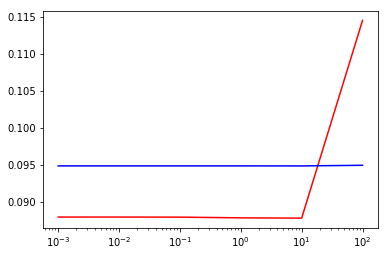

In [461]:
# plot 

plt.figure()
plt.semilogx(lambdas, val_errors, c="red")
plt.semilogx(lambdas, test_errors, c="blue")

### e)

In [444]:
X, Y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=420)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

In [445]:
ks = np.arange(1,11)
parameters = {'n_neighbors': ks}
clf = GridSearchCV(KNeighborsClassifier(weights="uniform"), parameters)
clf.fit(X_train, Y_train)
accuracy_cv = clf.cv_results_['mean_train_score']

In [446]:
accuracy = np.zeros(len(ks))
    
for i, k in enumerate(ks):
        
    knn = KNeighborsClassifier(n_neighbors=k, weights="uniform")
    knn.fit(X_train, Y_train)
    accuracy[i] = knn.score(X_test, Y_test)

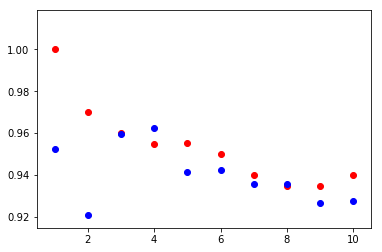

In [447]:
plt.figure()
plt.scatter(ks, accuracy_cv, c="red")
plt.scatter(ks, accuracy, c="blue")

In [448]:
accuracy_cv, accuracy

(array([1.        , 0.9701426 , 0.96004159, 0.95499109, 0.95513963,
        0.95008913, 0.93998812, 0.93493761, 0.93493761, 0.93998812]),
 array([0.95260664, 0.92101106, 0.95945234, 0.9626119 , 0.94154818,
        0.94260137, 0.93575566, 0.93575566, 0.92680358, 0.92785677]))

# Exercise 2

In [14]:
X, Y = get_data(400)
X_train, Y_train = X[:100], Y[:100]
X_test, Y_test = X[101:], Y[101:]

### a)

In [373]:
# linear regression: 
c = LinearRegression()
c.fit(X_train, Y_train)
Y_pred = c.predict(X_test)

mse_error = MSE(Y_pred, Y_test)
mse_error

13.360040495221037

### b)

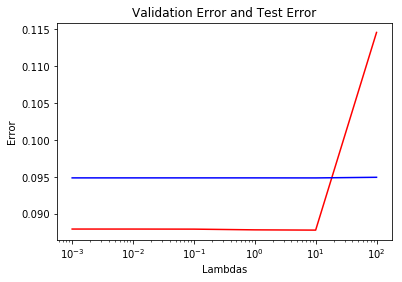

In [452]:
lambdas = [10**(-3), 10**(-2), 10**(-1), 1, 10, 100]
cv_errors = k_fold_cv_ridge(X_train, Y_train, lambdas, K=10)
test_errors = k_fold_cv_ridge(X_test, Y_test, lambdas, K=10)

plt.figure()
plt.semilogx(lambdas, cv_errors, c="red")
plt.semilogx(lambdas, test_errors, c="blue")
plt.title('Validation Error and Test Error')
plt.xlabel('Lambdas')
plt.ylabel('Error')

### c)

In [462]:
lambdas = [10**(-3), 10**(-2), 10**(-1), 1, 10, 100]
val_errors = []
for lam in lambdas: 
    c = Lasso(lam)
    errors = k_fold_evaluation_MSE(c, X_train, Y_train, 10)
    error = sum(errors)/10
    val_errors.append(error)

test_errors = []
for lam in lambdas: 
    c = Lasso(lam)
    errors = k_fold_evaluation_MSE(c, X_test, Y_test, 10)
    error = sum(errors)/10
    test_errors.append(error)
    
    

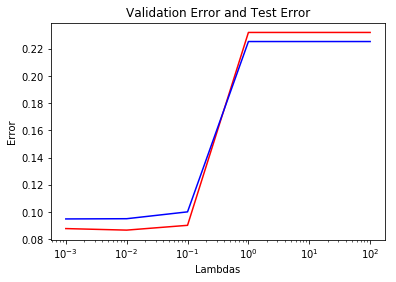

In [463]:
plt.figure()
plt.semilogx(lambdas, val_errors, c="red")
plt.semilogx(lambdas, test_errors, c="blue")
plt.title('Validation Error and Test Error')
plt.xlabel('Lambdas')
plt.ylabel('Error')